<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DGarcia-A01086411/blob/main/Actividad_Semana_8_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#David Eduardo Garcia Reyes - A01086411

##Actividad Semana 8 - 7 Regresiones

#**EJERCICIO 1 - Costo en la industria de la manufactura**

##Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
##Regresión Lineal.
###Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
##Regresión Polinomial.
###Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
##Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
##Finalmente grafica :
###MAE (de los cuatro métodos)
###R^2 (de los cuatro métodos)
##Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [18]:
#Importar librerias necesarias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [4]:
#Cargar dataset
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
590,4.735663,32.574798
103,2.800515,45.173687
684,5.091349,37.011431
540,4.576400,30.465159
562,4.634070,40.012868
347,3.981926,36.535101
951,6.767158,35.994190
155,3.117485,43.258597
330,3.920927,43.072496
551,4.606940,42.150336


In [5]:
X = df[['Number of Units']]
Y = df['Manufacturing Cost']

In [6]:
len(X)

1000

In [7]:
Y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

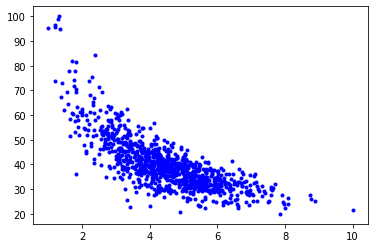

In [8]:
plt.plot(X,Y,'b.')

In [9]:
#Dividir los datos de costos de manufactura
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 200
number of training samples: 800


In [10]:
#Regresion Lineal

In [11]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x_train, y_train)
linear_reg.coef_, linear_reg.intercept_

(array([-6.04244726]), 67.01306355970974)

Ecuación:

$\hat{y} = -6.0424X + 67.0130$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


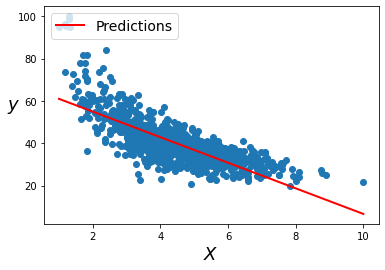

In [12]:
#Visualizar prediccion
X_fit = np.linspace(1, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [16]:
#MAE, R^2 Error, R^2 Score
yhat = linear_reg.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Mean Absolute Error (MAE): 4.920843720260218
Root Mean Squared Error: 6.8718075865038175
R^2 Score 0.5789359098485234


In [17]:
#Regresion Polinomial

In [19]:
from sklearn.preprocessing import PolynomialFeatures
Polynomial = PolynomialFeatures(degree=2, include_bias=False)
Polynomial_features = Polynomial.fit_transform(X)
Polynomial_reg_model = LinearRegression()
Polynomial_reg_model.fit(Polynomial_features, Y)
Polynomial_reg_model.coef_, Polynomial_reg_model.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

Ecuación:

$\hat{y} = -16.8242X + 1.1733X^2 + 89.7371$

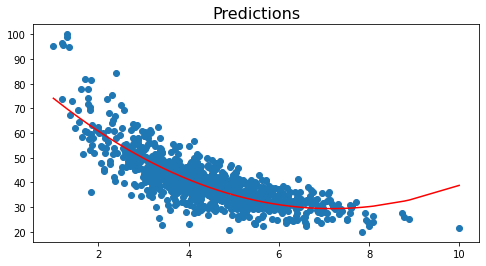

In [23]:
#Visualizar prediccion
y_predicted = Polynomial_reg_model.predict(Polynomial_features)

plt.figure(figsize=(8, 4))
plt.title("Predictions", size=16)
plt.scatter(X, Y)
plt.plot(X, y_predicted, c="red")
plt.show()

In [21]:
#MAE, R^2 Error, R^2 Score
yhat = Polynomial_reg_model.predict(Polynomial_features)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Mean Absolute Error (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
R^2 Score 0.6650268116056028


In [24]:
#Regresion Ridge

In [26]:
from sklearn.linear_model import Ridge
Ridge_regr = Ridge(fit_intercept=True)
Ridge_regr.fit(x_train, y_train)
y_new = Ridge_regr.predict(x_test)
Ridge_regr.coef_, Ridge_regr.intercept_

(array([-6.03819131]), 66.99400595374111)

Ecuación:

$\hat{y} = -6.0381X + 66.9940$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


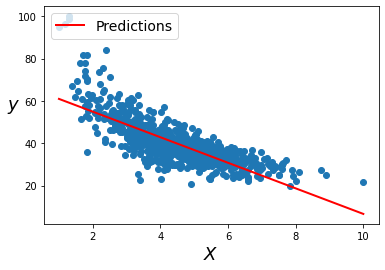

In [28]:
#Visualizar prediccion
x_fit = np.linspace(1, 10, 100)
y_fit = Ridge_regr.predict(x_fit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [29]:
#MAE, R^2 Error, R^2 Score
yhat = Ridge_regr.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Mean Absolute Error (MAE): 4.920334804939648
Root Mean Squared Error: 6.871800116619259
R^2 Score 0.5789368252695086


In [30]:
#Regresion Lasso

In [31]:
from sklearn.linear_model import Lasso
Lasso_regr = Lasso(fit_intercept=True)
Lasso_regr.fit(x_train, y_train)
y_new = Lasso_regr.predict(x_test)
Lasso_regr.coef_, Lasso_regr.intercept_

(array([-5.47857595]), 64.48812123765603)

Ecuación:

$\hat{y} = -5.4785X + 64.4881$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


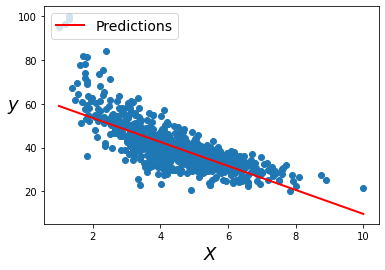

In [32]:
#Visualizar prediccion
x_fit = np.linspace(1, 10, 100)
y_fit = Lasso_regr.predict(x_fit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [33]:
#MAE, R^2 Error, R^2 Score
yhat = Lasso_regr.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Mean Absolute Error (MAE): 4.879792294340519
Root Mean Squared Error: 6.911657655968669
R^2 Score 0.5740381924561732


AttributeError: ignored

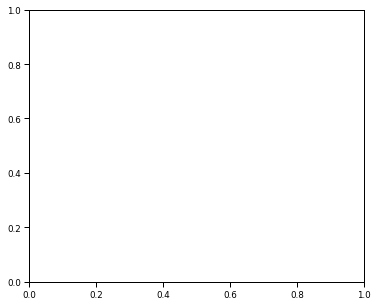

In [36]:
#Graficar MAE
sns.set_context('paper')
f, ax = plt.subplots(figsize = (6,5))

sns.barplot(data = MAE, x = 'Modelo', y = 'MAE',  palette = 'Blues', edgecolor = 'w').set(title="MAE")
plt.xlabel('Modelo', fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=45)

#**EJERCICIO 2 - Regresión Multiple**

##Encuentra el mejor regresor para los datos de las casas:

##Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
##Regresión Múltiple Lineal.
###Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
##Regresión Múltiple Polinomial.
###Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.
##Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.
##Finalmente gráfica :
###MAE (de los cuatro métodos)
###R^2 (de los cuatro métodos)
##Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?